Problem Statement :
    
The Goal is to predict whether a person has an income of more than 50K a year or not.
This is basically a binary classification problem where a person is classified into the >50K group or <=50K group.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/devarakondajagannath/Desktop/Datasets/adult.csv")

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
country           False
salary            False
dtype: bool

In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [8]:
dv = df.duplicated()

In [9]:
dv.sum()

24

In [10]:
df[dv]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [11]:
df.drop_duplicates(inplace = True)

In [12]:
dv2 = df.duplicated()
dv2.sum()

0

In [13]:
z = df.salary.value_counts(normalize = True)

In [14]:
df.age.sort_values(ascending=False)

32367    90
5272     90
4109     90
22220    90
18725    90
         ..
24009    17
13091    17
12318    17
10281    17
14896    17
Name: age, Length: 32537, dtype: int64

In [15]:
education = df['education'].value_counts(normalize = True)

In [16]:
education

 HS-grad         0.322525
 Some-college    0.223807
 Bachelors       0.164520
 Masters         0.052924
 Assoc-voc       0.042475
 11th            0.036113
 Assoc-acdm      0.032793
 10th            0.028675
 7th-8th         0.019824
 Prof-school     0.017703
 9th             0.015797
 12th            0.013308
 Doctorate       0.012693
 5th-6th         0.010204
 1st-4th         0.005102
 Preschool       0.001537
Name: education, dtype: float64

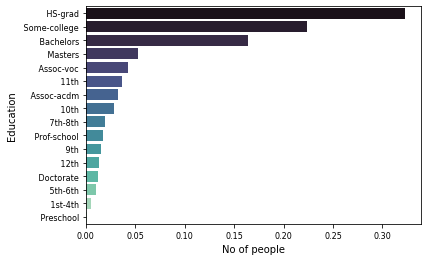

In [17]:
sns.barplot(education.values,education.index,palette='mako')
plt.xlabel('No of people')
plt.ylabel('Education')
plt.tick_params(labelsize=8)
plt.show()

Here we see that the majority of people have completed HS-Grad, College or Bachelors

In [18]:
ms = df['marital-status'].value_counts(normalize = True)

In [19]:
ms

 Married-civ-spouse       0.460092
 Never-married            0.327842
 Divorced                 0.136491
 Separated                0.031503
 Widowed                  0.030519
 Married-spouse-absent    0.012847
 Married-AF-spouse        0.000707
Name: marital-status, dtype: float64

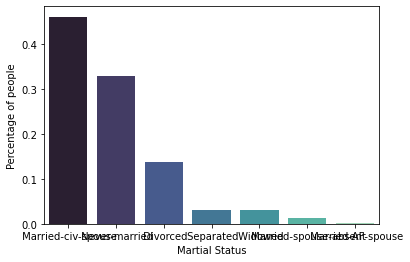

In [20]:
sns.barplot(ms.index,ms.values,linewidth = 50,palette = 'mako')
plt.xlabel('Martial Status')
plt.ylabel('Percentage of people')
plt.show()

<AxesSubplot:xlabel='age', ylabel='salary'>

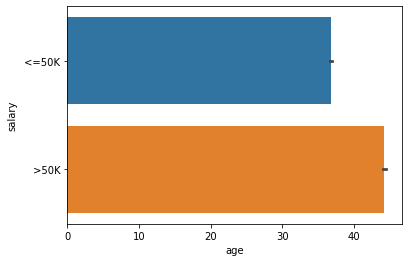

In [21]:
sns.barplot(data = df,x = 'age', y = 'salary')

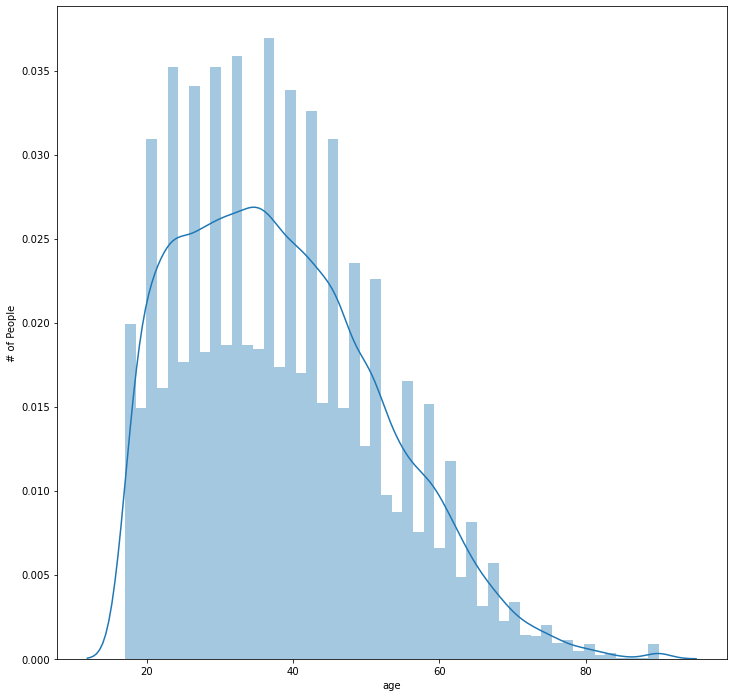

In [22]:
plt.figure(figsize=(12,12))
sns.distplot(df['age'])
plt.ticklabel_format(style='scientific', axis='x')
plt.ylabel('# of People')
plt.show()

In [23]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education-num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital-gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital-loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
hours-per-week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


In [24]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [25]:
df.replace(to_replace = [' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'],value = [1,2,3,4,5,6,7,8,9],inplace = True)

In [26]:
x1 = df.workclass.value_counts(normalize = True)

In [27]:
x1

3    0.696837
2    0.078065
5    0.064327
6    0.056428
1    0.039893
7    0.034299
4    0.029505
8    0.000430
9    0.000215
Name: workclass, dtype: float64

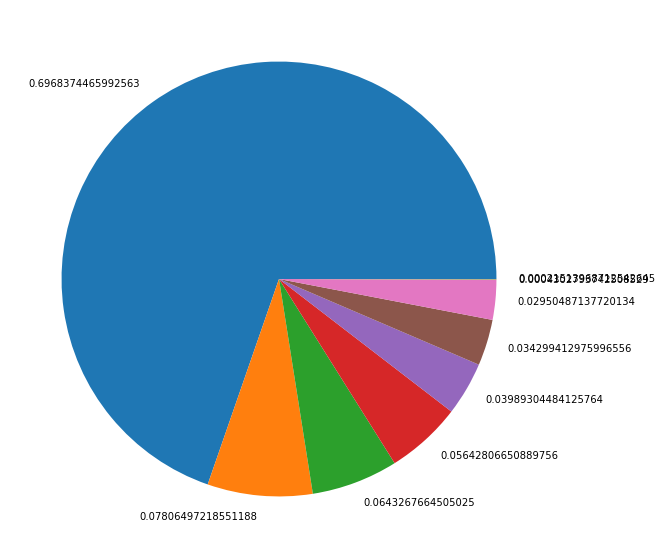

In [28]:
plt.figure(figsize = (10,10))
plt.pie(x1,labels = x1)
plt.show()

From the above graph we can conclude that most people are private employees and their percentage is 69.6837

State gov employee percentage is only 3.98 %

Federal gov employee percentage is only 2.95 %

In [29]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [30]:
df.race.value_counts(normalize = True)

 White                 0.854258
 Black                 0.095952
 Asian-Pac-Islander    0.031902
 Amer-Indian-Eskimo    0.009558
 Other                 0.008329
Name: race, dtype: float64

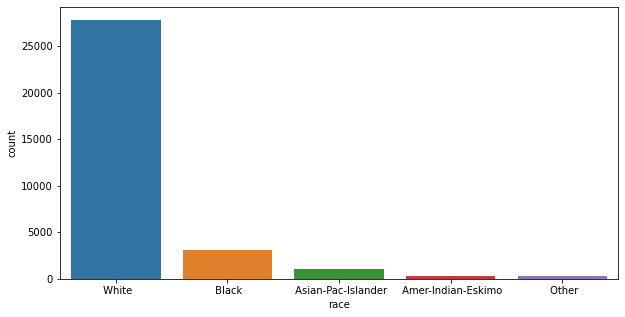

In [31]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'race', data = df)
plt.show()

Most of the People's are white in colour and it's percentage is 85.4258 %

In [32]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [33]:
df.replace(to_replace = [' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'],value = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],inplace = True)

In [34]:
x2 = df.education.value_counts()

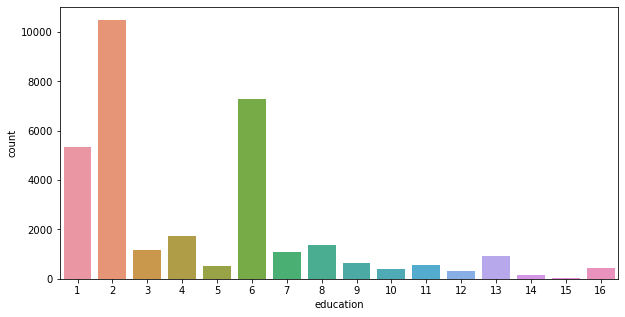

In [35]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'education', data = df)
plt.show()

In [36]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [37]:
df.replace(to_replace=[' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'],value=[1,2,3,4,5,6,7],inplace = True)

In [38]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', 6, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [39]:
df.replace(to_replace=[' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', 6, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'],value=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],inplace = True)

In [40]:
x3 = df.occupation.value_counts()

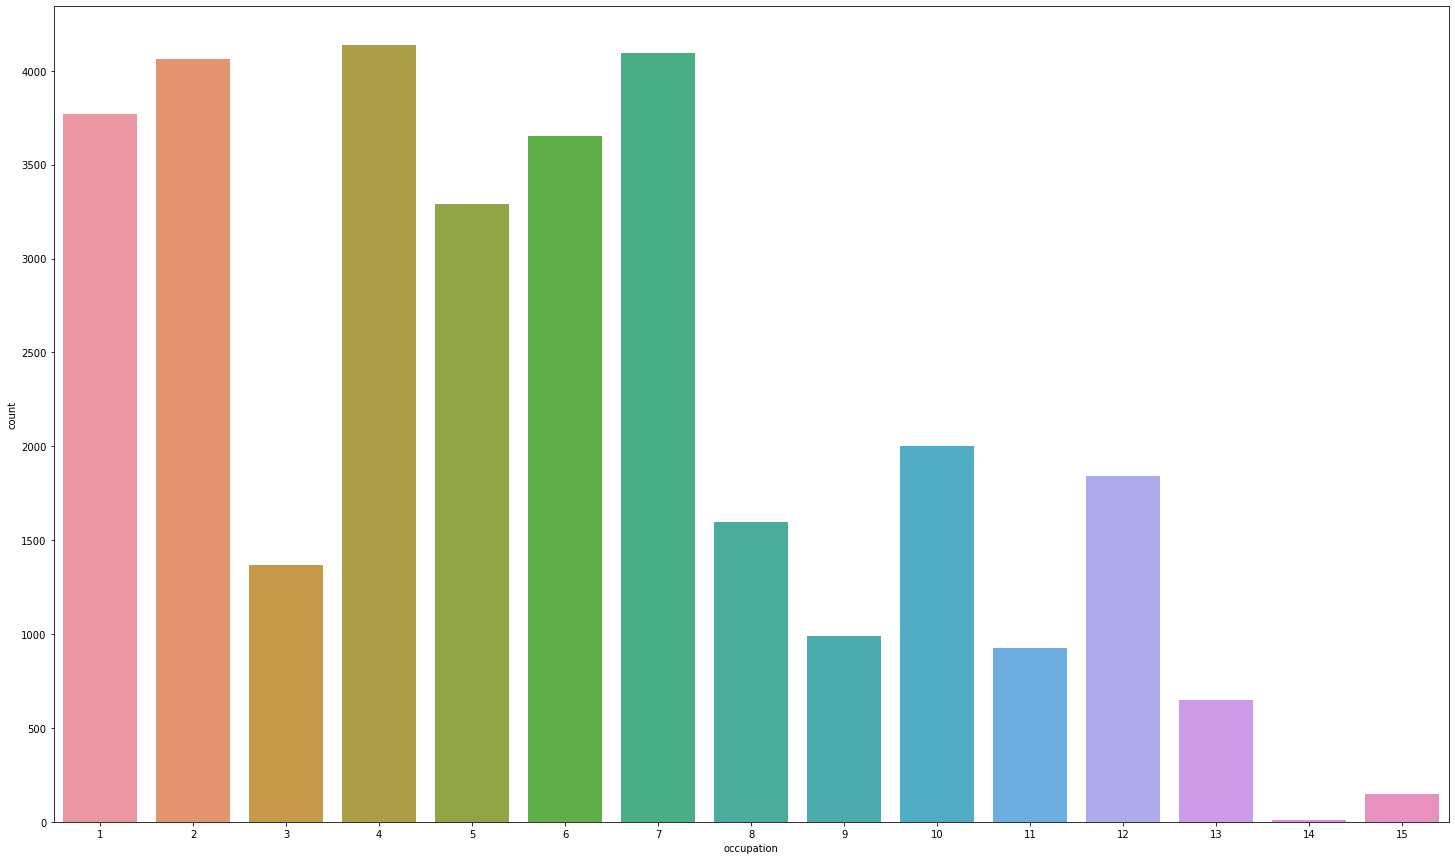

In [41]:
plt.figure(figsize = (25,15))
sns.countplot(x = 'occupation', data = df)
plt.show()

In [42]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [43]:
df.replace(to_replace = [' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'],value = [1,2,3,4,5,6],inplace = True)

In [44]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [45]:
df.replace(to_replace = [' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'] , value = [1,2,3,4,5],inplace = True)

In [46]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

Encoding sex feature by 0 and 1. Male is 0 and Female is 1

In [47]:
df.replace(to_replace = [' Male', ' Female'],value = [0,1],inplace = True)

In [48]:
df['country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', 12, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [49]:
df.replace(to_replace = [' United-States', ' Cuba', ' Jamaica', ' India', 12, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'],value = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,37,39,40,41,42],inplace = True)

In [50]:
df.country.value_counts()

1     29153
6       639
5       582
14      198
12      137
11      121
16      119
8       114
26      106
37      101
4       100
2        95
10       90
3        81
7        80
29       75
15       73
25       70
30       62
28       62
22       51
23       44
13       43
24       37
32       31
27       29
36       29
20       28
40       24
39       20
18       19
35       19
19       18
21       18
31       16
33       14
9        13
41       13
34       12
42        1
Name: country, dtype: int64

In [51]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [52]:
df.replace(to_replace = [' <=50K', ' >50K'],value = [0,1],inplace = True)

In [53]:
df.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
count,32537.000000,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,3.253803,1.897808e+05,4.128254,9.823585,2.083566,5.269263,2.542859,1.221748,0.330762,1078.443741,87.368227,40.401143,2.284999,0.240926
std,13.637984,1.119409,1.055565e+05,3.281838,2.745111,1.249659,3.009768,1.437456,0.627447,0.470495,7387.957424,403.101833,12.448263,5.023403,0.427652
min,17.000000,1.000000,1.228500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,28.000000,3.000000,1.178270e+05,2.000000,9.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,40.000000,1.000000,0.000000
50%,37.000000,3.000000,1.783560e+05,3.000000,10.000000,2.000000,5.000000,2.000000,1.000000,0.000000,0.000000,0.000000,40.000000,1.000000,0.000000
75%,48.000000,3.000000,2.369930e+05,5.000000,11.000000,2.000000,7.000000,4.000000,1.000000,1.000000,0.000000,0.000000,45.000000,1.000000,0.000000
max,90.000000,9.000000,1.484705e+06,16.000000,16.000000,7.000000,15.000000,6.000000,5.000000,1.000000,99999.000000,4356.000000,99.000000,42.000000,1.000000


In [54]:
df.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
age,1.000000,0.081451,-0.076447,0.015669,0.042203,0.425516,-0.002582,-0.218007,-0.040399,-0.088708,0.077676,0.057745,0.068649,-0.011163,0.234037
workclass,0.081451,1.000000,-0.006359,0.003120,0.023123,0.032977,-0.045709,0.006419,0.005724,0.007678,0.048283,0.016981,0.003799,-0.010251,0.067762
fnlwgt,-0.076447,-0.006359,1.000000,0.017424,-0.044231,-0.023545,0.010349,0.017248,0.000660,-0.027089,0.000429,-0.010260,-0.018427,0.035943,-0.009502
education,0.015669,0.003120,0.017424,1.000000,-0.318057,0.011791,0.050422,0.035206,0.027175,-0.003787,0.032549,0.000372,-0.041898,0.051781,-0.030602
education-num,0.042203,0.023123,-0.044231,-0.318057,1.000000,-0.063472,-0.211967,-0.128791,-0.036102,-0.022451,0.120823,0.074379,0.141556,-0.057357,0.316892
marital-status,0.425516,0.032977,-0.023545,0.011791,-0.063472,1.000000,-0.008818,0.028796,0.012938,0.181950,0.004460,0.006882,-0.000357,0.002424,0.002181
occupation,-0.002582,-0.045709,0.010349,0.050422,-0.211967,-0.008818,1.000000,-0.045274,0.007068,-0.201717,-0.042231,-0.018152,0.040251,0.023423,-0.075499
relationship,-0.218007,0.006419,0.017248,0.035206,-0.128791,0.028796,-0.045274,1.000000,0.096857,0.273568,-0.044107,-0.050586,-0.184659,0.042798,-0.171516
race,-0.040399,0.005724,0.000660,0.027175,-0.036102,0.012938,0.007068,0.096857,1.000000,0.068043,-0.008002,-0.017208,-0.032623,0.241663,-0.067727
sex,-0.088708,0.007678,-0.027089,-0.003787,-0.022451,0.181950,-0.201717,0.273568,0.068043,1.000000,-0.048489,-0.045571,-0.228687,0.005525,-0.215969


Checking for Outliers

<AxesSubplot:>

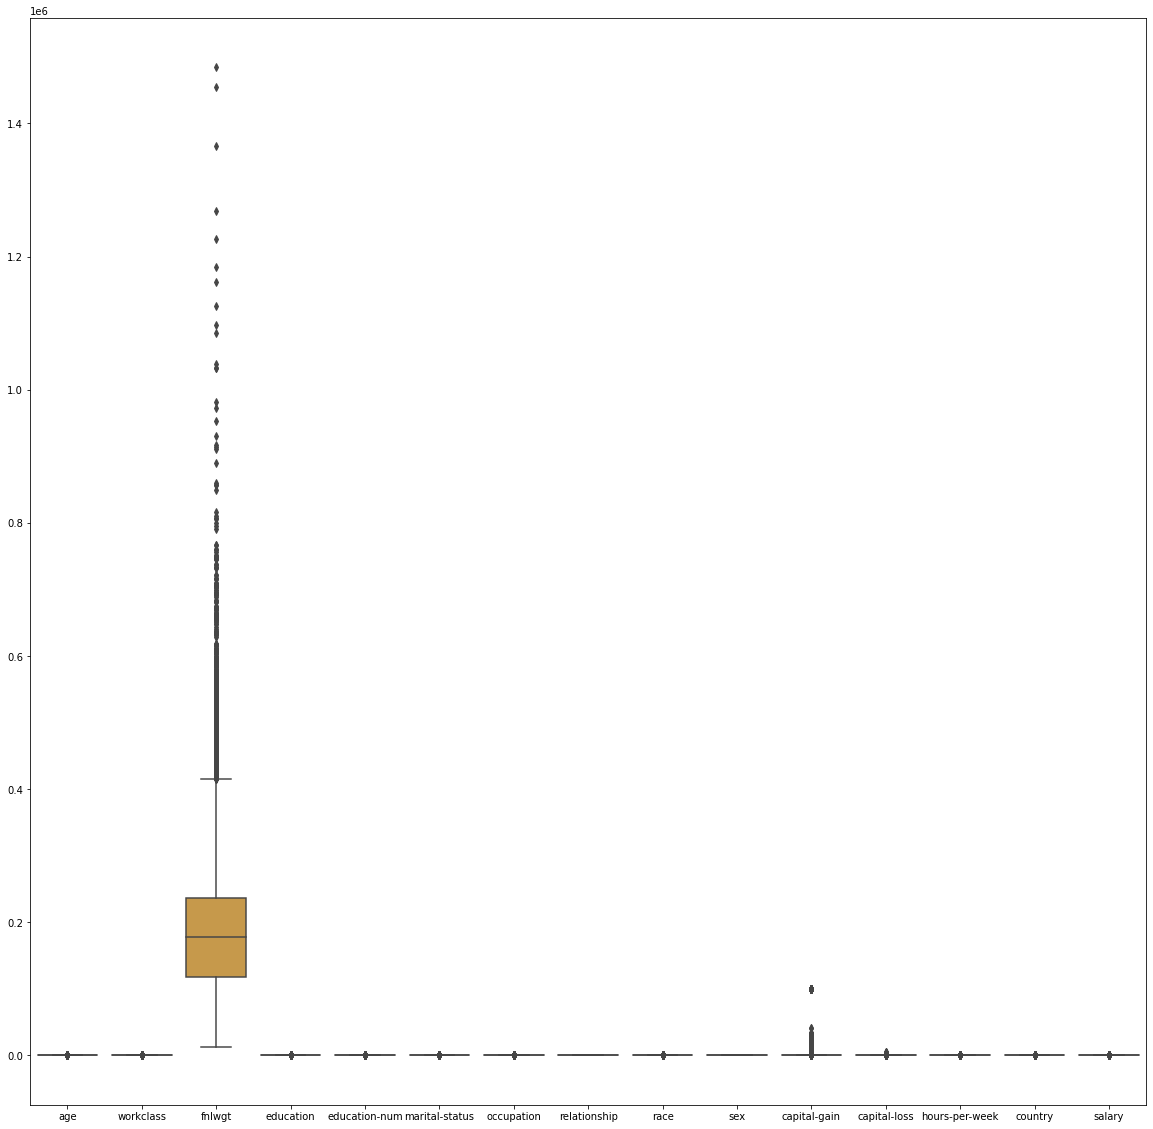

In [55]:
fig,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df,ax = ax)

In [56]:
outliers = []
def age_outliers(df):
    data = sorted(df.age)
    q1 = np.percentile(df.age, 25)
    q3 = np.percentile(df.age, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in df.age: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = age_outliers(df)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [79, 90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 79, 81, 80, 83, 90, 90, 79, 81, 90, 80, 90, 90, 79, 79, 84, 90, 80, 90, 81, 83, 84, 81, 79, 85, 82, 79, 80, 90, 90, 90, 84, 80, 90, 90, 79, 84, 90, 79, 90, 90, 90, 82, 81, 90, 84, 79, 81, 82, 81, 80, 90, 80, 84, 82, 79, 90, 84, 90, 83, 79, 81, 80, 79, 80, 79, 80, 90, 90, 80, 90, 90, 81, 83, 82, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 81, 79, 80, 79, 81, 82, 88, 90, 82, 88, 84, 83, 79, 86, 90, 90, 82, 83, 81, 79, 90, 80, 81, 79, 84, 84, 79, 90, 80, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 90, 85, 82, 81]


In [57]:
outliers = []
def fnlwgt_outliers(df):
    data = sorted(df.fnlwgt)
    q1 = np.percentile(df.fnlwgt, 25)
    q3 = np.percentile(df.fnlwgt, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in df.fnlwgt: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = age_outliers(df)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [79, 90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 79, 81, 80, 83, 90, 90, 79, 81, 90, 80, 90, 90, 79, 79, 84, 90, 80, 90, 81, 83, 84, 81, 79, 85, 82, 79, 80, 90, 90, 90, 84, 80, 90, 90, 79, 84, 90, 79, 90, 90, 90, 82, 81, 90, 84, 79, 81, 82, 81, 80, 90, 80, 84, 82, 79, 90, 84, 90, 83, 79, 81, 80, 79, 80, 79, 80, 90, 90, 80, 90, 90, 81, 83, 82, 90, 90, 81, 80, 80, 90, 79, 80, 82, 85, 80, 79, 90, 81, 79, 80, 79, 81, 82, 88, 90, 82, 88, 84, 83, 79, 86, 90, 90, 82, 83, 81, 79, 90, 80, 81, 79, 84, 84, 79, 90, 80, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 90, 85, 82, 81]


In [58]:
median = df.loc[df['age']<75, 'age'].median()
df.loc[df.age > 75, 'age'] = np.nan
df.fillna(median,inplace=True)

In [59]:
outliers = []
def age_outliers(df):
    data = sorted(df.age)
    q1 = np.percentile(df.age, 25)
    q3 = np.percentile(df.age, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in df.age: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = age_outliers(df)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  []


<AxesSubplot:>

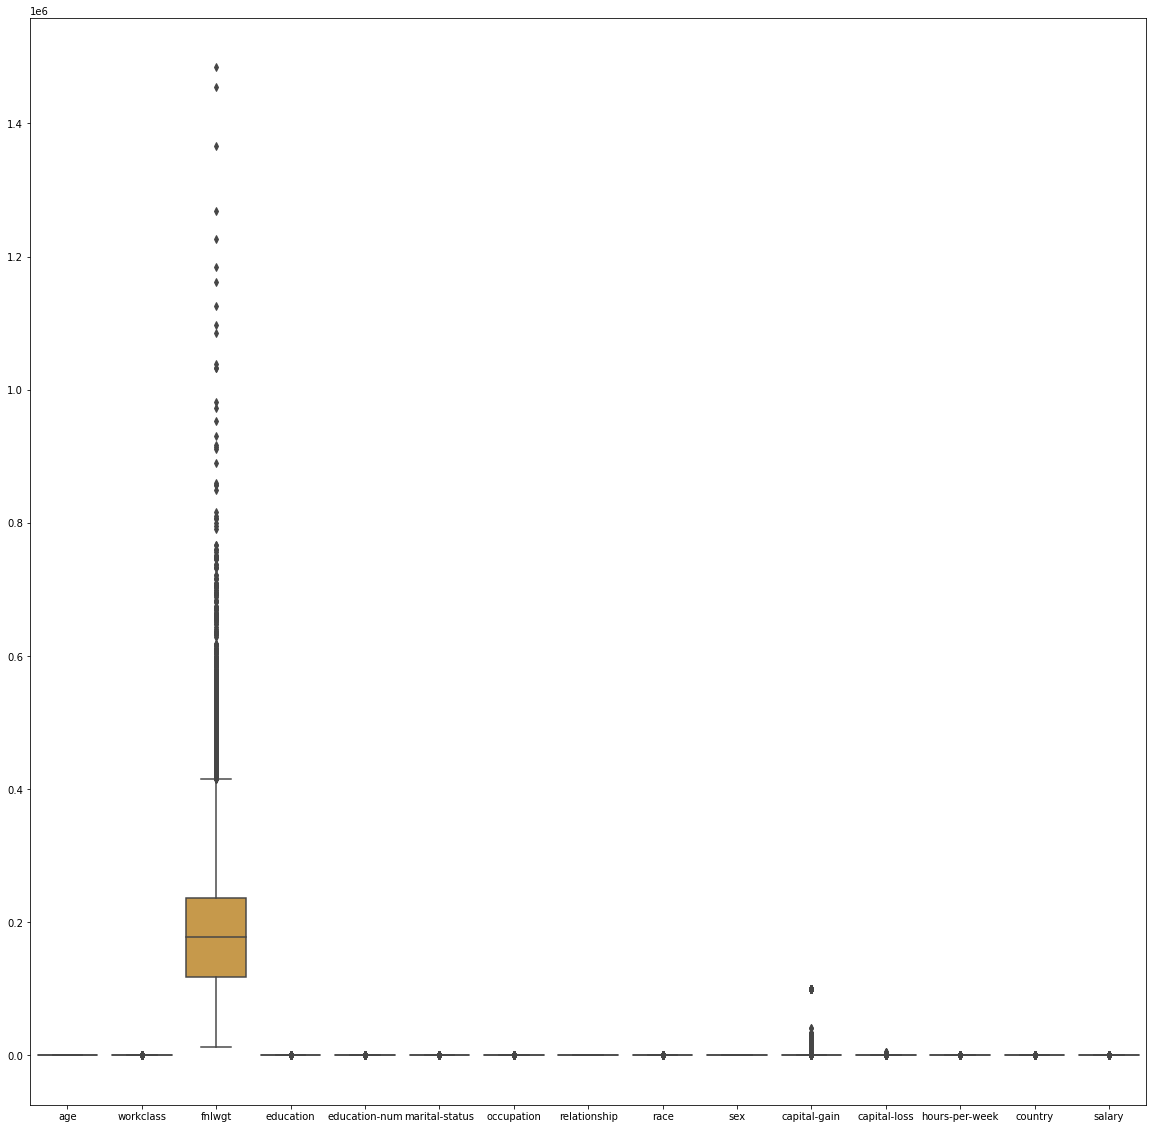

In [60]:
fig,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df,ax = ax)

In [61]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39.0,1,77516,1,13,1,1,1,1,0,2174,0,40,1,0
1,50.0,2,83311,1,13,2,2,2,1,0,0,0,13,1,0
2,38.0,3,215646,2,9,3,3,1,1,0,0,0,40,1,0
3,53.0,3,234721,3,7,2,3,2,2,0,0,0,40,1,0
4,28.0,3,338409,1,13,2,4,3,2,1,0,0,40,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,3,257302,7,5,2,11,3,1,1,0,0,38,1,0
32557,40.0,3,154374,2,9,2,10,2,1,0,0,0,40,1,1
32558,58.0,3,151910,2,9,7,1,5,1,1,0,0,40,1,0
32559,22.0,3,201490,2,9,1,1,4,1,0,0,0,20,1,0


In [62]:
df.salary

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32537, dtype: int64

In [63]:
df['salary'].groupby(df['age']).value_counts(normalize=True)

age   salary
17.0  0         1.000000
18.0  0         1.000000
19.0  0         0.997175
      1         0.002825
20.0  0         1.000000
                  ...   
73.0  1         0.156250
74.0  0         0.764706
      1         0.235294
75.0  0         0.844444
      1         0.155556
Name: salary, Length: 115, dtype: float64

In [64]:
df['age'].unique()

array([39., 50., 38., 53., 28., 37., 49., 52., 31., 42., 30., 23., 32.,
       40., 34., 25., 43., 54., 35., 59., 56., 19., 20., 45., 22., 48.,
       21., 24., 57., 44., 41., 29., 18., 47., 46., 36., 27., 67., 33.,
       17., 55., 61., 70., 64., 71., 68., 66., 51., 58., 26., 60., 75.,
       65., 62., 63., 72., 74., 69., 73.])

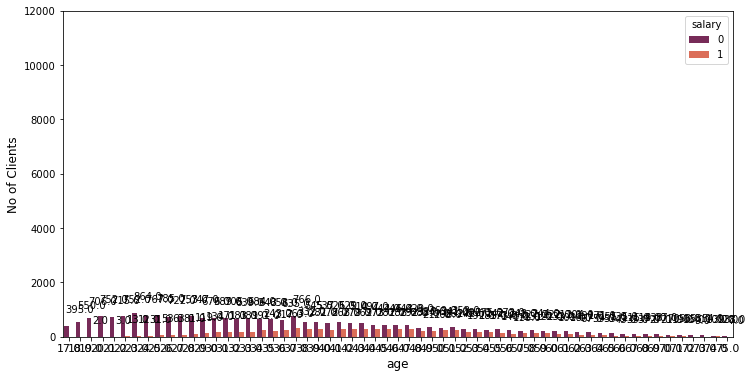

In [65]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data = df,x='age',hue='salary',palette='rocket')
plt.xlabel("age", fontsize= 12)
plt.ylabel("No of Clients", fontsize= 12)
plt.ylim(0,12000)
plt.xticks( fontsize = 11)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))
plt.show()

In [66]:
df['sex'].unique()

array([0, 1])

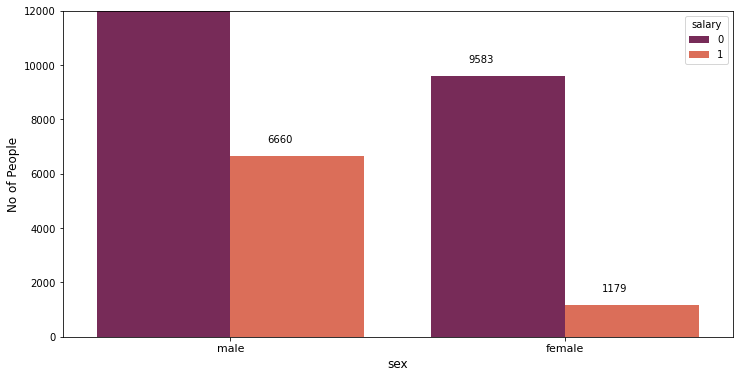

In [67]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data = df,x='sex',hue='salary',palette='rocket')
plt.xlabel("sex", fontsize= 12)
plt.ylabel("No of People", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1],['male','female'], fontsize = 11)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))
plt.show()

In [68]:
df['marital-status'].unique()

array([1, 2, 3, 4, 5, 7])

In [69]:
df['salary'].groupby(df['marital-status']).value_counts(normalize=True)

marital-status  salary
1               0         0.953970
                1         0.046030
2               0         0.553106
                1         0.446894
3               0         0.895744
                1         0.104256
4               0         0.918660
                1         0.081340
5               0         0.927481
                1         0.072519
7               0         0.914401
                1         0.085599
Name: salary, dtype: float64

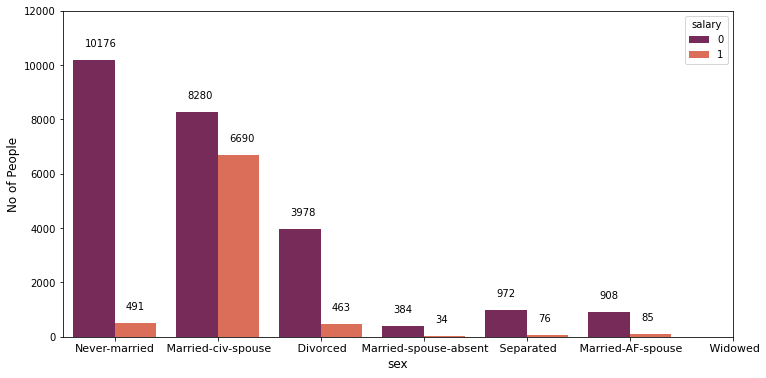

In [70]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data = df,x='marital-status',hue='salary',palette='rocket')
plt.xlabel("sex", fontsize= 12)
plt.ylabel("No of People", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3,4,5,6,],['Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], fontsize = 11)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))
plt.show()

In [71]:
df['education'].unique()

array([ 1,  2,  3,  4,  5,  7,  8,  9, 10, 11, 13, 14, 15, 16])

In [72]:
df['salary'].groupby(df['education']).value_counts(normalize=True)

education  salary
1          0         0.585092
           1         0.414908
2          0         0.840480
           1         0.159520
3          0         0.948936
           1         0.051064
4          1         0.556911
           0         0.443089
5          0         0.824188
           1         0.175812
7          0         0.751640
           1         0.248360
8          0         0.738784
           1         0.261216
9          0         0.937984
           1         0.062016
10         1         0.740920
           0         0.259080
11         1         0.734375
           0         0.265625
13         0         0.933548
           1         0.066452
14         0         0.963855
           1         0.036145
15         0         1.000000
16         0         0.923788
           1         0.076212
Name: salary, dtype: float64

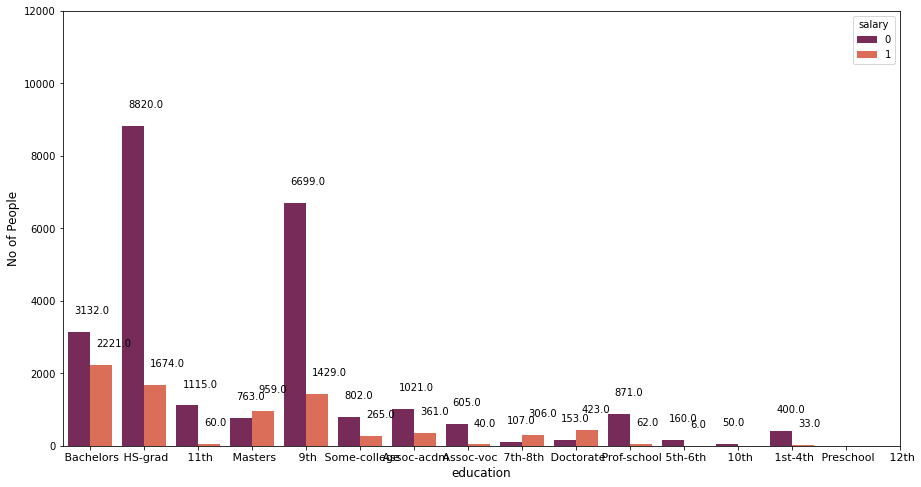

In [73]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data = df,x='education',hue='salary',palette='rocket')
plt.xlabel("education", fontsize= 12)
plt.ylabel("No of People", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],[' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], fontsize = 11)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))
plt.show()

In [74]:
df['race'].unique()

array([1, 2, 3, 4, 5])

In [75]:
df['salary'].groupby(df['race']).value_counts(normalize=True)

race  salary
1     0         0.744019
      1         0.255981
2     0         0.876041
      1         0.123959
3     0         0.734104
      1         0.265896
4     0         0.884244
      1         0.115756
5     0         0.907749
      1         0.092251
Name: salary, dtype: float64

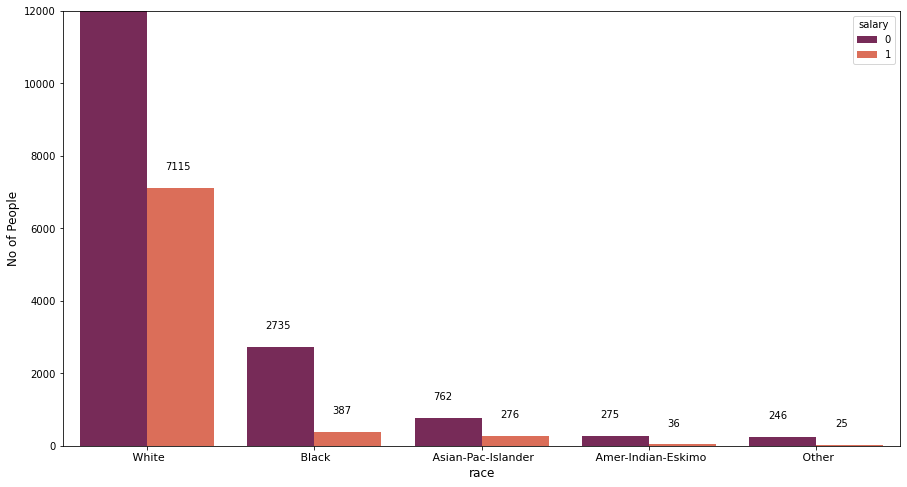

In [76]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data = df,x='race',hue='salary',palette='rocket')
plt.xlabel("race", fontsize= 12)
plt.ylabel("No of People", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3,4,],[' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], fontsize = 11)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))
plt.show()

In [77]:
df['occupation'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15])

In [78]:
df['salary'].groupby(df['occupation']).value_counts(normalize=True)

occupation  salary
1           0         0.865446
            1         0.134554
2           0         0.515867
            1         0.484133
3           0         0.937180
            1         0.062820
4           0         0.550774
            1         0.449226
5           0         0.936112
            1         0.063888
6           0         0.730685
            1         0.269315
7           0         0.773083
            1         0.226917
8           0         0.799624
            1         0.200376
9           0         0.884073
            1         0.115927
10          0         0.875500
            1         0.124500
11          0         0.694714
            1         0.305286
13          0         0.674884
            1         0.325116
14          0         0.888889
            1         0.111111
15          0         0.993197
            1         0.006803
Name: salary, dtype: float64

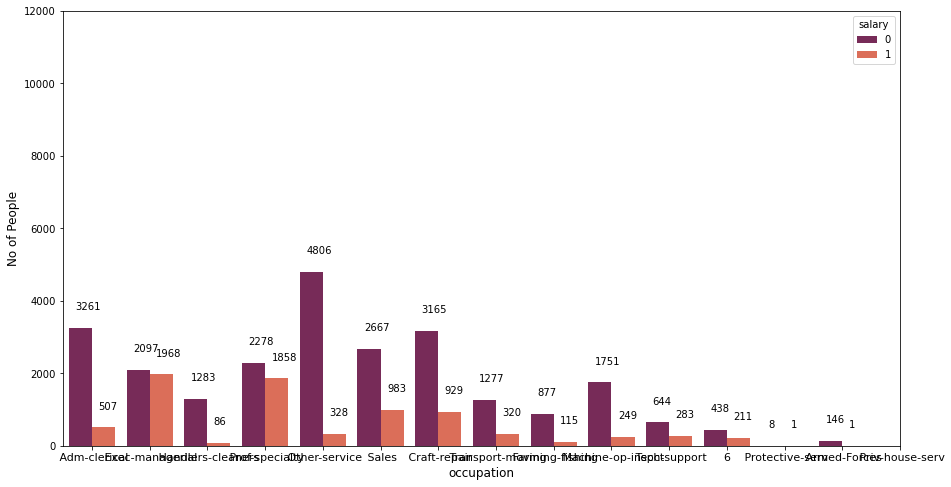

In [79]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data = df,x='occupation',hue='salary',palette='rocket')
plt.xlabel("occupation", fontsize= 12)
plt.ylabel("No of People", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],[' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', 6, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], fontsize = 11)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))
plt.show()

In [80]:
df['workclass'].unique()

array([1, 2, 3, 4, 5, 7, 8, 9])

In [81]:
df['salary'].groupby(df['workclass']).value_counts(normalize=True)

workclass  salary
1          0         0.728043
           1         0.271957
2          0         0.714961
           1         0.285039
3          0         0.781193
           1         0.218807
4          0         0.613542
           1         0.386458
5          0         0.794350
           1         0.205650
7          1         0.557348
           0         0.442652
8          0         1.000000
9          0         1.000000
Name: salary, dtype: float64

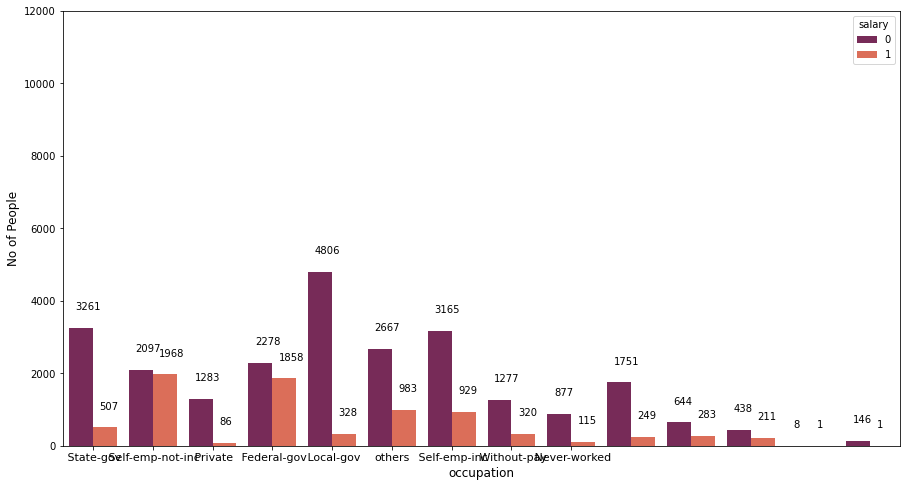

In [82]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data = df,x='occupation',hue='salary',palette='rocket')
plt.xlabel("occupation", fontsize= 12)
plt.ylabel("No of People", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3,4,5,6,7,8],[' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'others', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], fontsize = 11)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))
plt.show()

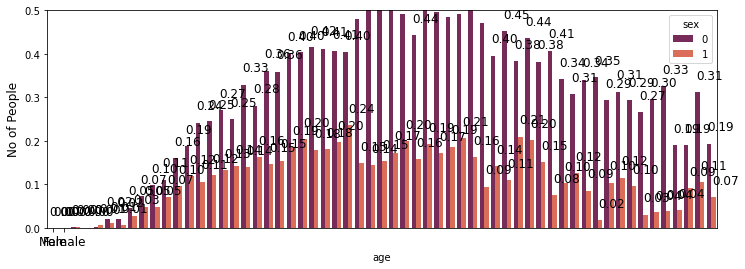

In [83]:
plt.figure(figsize=(12,4))

ax = sns.barplot(x = "age", y = "salary", hue = "sex", data = df, palette = 'rocket', ci = None)

plt.ylabel("No of People", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()

In [84]:
x = df.drop(columns = ['salary'])

In [86]:
y = df.salary

In [87]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32537, dtype: int64

In [88]:
x.shape

(32537, 14)

In [89]:
y.shape

(32537,)

In [93]:
from sklearn.preprocessing import StandardScaler

In [96]:
sc = StandardScaler()

In [97]:
sc.fit(df)

StandardScaler()

In [98]:
sc.transform(df)

array([[ 0.05626008, -2.01341793, -1.06356884, ..., -0.03222534,
        -0.25580635, -0.56337742],
       [ 0.89385893, -1.12007561, -1.00866848, ..., -2.20123597,
        -0.25580635, -0.56337742],
       [-0.01988527, -0.22673328,  0.24503992, ..., -0.03222534,
        -0.25580635, -0.56337742],
       ...,
       [ 1.50302173, -0.22673328, -0.35877886, ..., -0.03222534,
        -0.25580635, -0.56337742],
       [-1.23821087, -0.22673328,  0.11092955, ..., -1.63889988,
        -0.25580635, -0.56337742],
       [ 1.04614963,  3.346636  ,  0.92981187, ..., -0.03222534,
        -0.25580635,  1.77500901]])

In [99]:
x = df.drop(columns=['salary'])

In [100]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39.0,1,77516,1,13,1,1,1,1,0,2174,0,40,1
1,50.0,2,83311,1,13,2,2,2,1,0,0,0,13,1
2,38.0,3,215646,2,9,3,3,1,1,0,0,0,40,1
3,53.0,3,234721,3,7,2,3,2,2,0,0,0,40,1
4,28.0,3,338409,1,13,2,4,3,2,1,0,0,40,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,3,257302,7,5,2,11,3,1,1,0,0,38,1
32557,40.0,3,154374,2,9,2,10,2,1,0,0,0,40,1
32558,58.0,3,151910,2,9,7,1,5,1,1,0,0,40,1
32559,22.0,3,201490,2,9,1,1,4,1,0,0,0,20,1


In [102]:
y = df.salary

In [103]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32537, dtype: int64

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report,mean_squared_error
from sklearn.model_selection import GridSearchCV

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,test_size=0.20)

In [106]:
lg_model = LogisticRegression()

In [107]:
lg_model.fit(x_train,y_train)

LogisticRegression()

In [108]:
y_pred = lg_model.predict(x_test)

In [109]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [110]:
acc = lg_model.score(x_train,y_train)
acc1 = lg_model.score(x_test,y_test)
print(f'Training dataset accuracy of the model is {acc}')
print(f'Test dataset accuracy of the model is {acc1}')

Training dataset accuracy of the model is 0.7974182642437282
Test dataset accuracy of the model is 0.7973263675476336


In [111]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

In [112]:
pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=y_test))

,0,1
0,4783,131
1,1188,406


<AxesSubplot:>

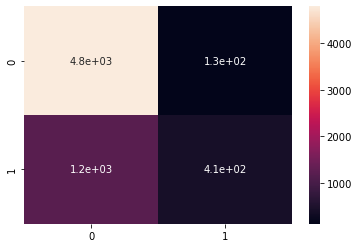

In [113]:
sns.heatmap(confusion_matrix(y_pred=y_pred, y_true=y_test),annot=True)

In [114]:
print('recall :', recall_score(y_test, y_pred))
print('precision :', precision_score(y_test, y_pred))
print('F1 :', f1_score(y_test, y_pred))
print('accuracy :', accuracy_score(y_test, y_pred))

recall : 0.2547051442910916
precision : 0.7560521415270018
F1 : 0.3810417644298451
accuracy : 0.7973263675476336


In [115]:
auc = roc_auc_score(y_test, y_pred)
auc

0.6140233088162824

In [116]:
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model1: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      5971
           1       0.25      0.76      0.38       537

    accuracy                           0.80      6508
   macro avg       0.61      0.78      0.63      6508
weighted avg       0.91      0.80      0.84      6508

[[4783 1188]
 [ 131  406]]

Accuracy Score for model1:  0.7973263675476336


In [117]:
from sklearn import svm

In [118]:
clf = svm.SVC()

In [119]:
clf.fit(x_train,y_train)

SVC()

In [120]:
y_pred1 = clf.predict(x_test)

In [121]:
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [122]:
acc1 = clf.score(x_train,y_train)
acc1

0.7961888662645511

In [123]:
acc2 = clf.score(x_train,y_train)
acc3 = clf.score(x_test,y_test)
print(f'Training dataset accuracy of the model is {acc2}')
print(f'Test dataset accuracy of the model is {acc3}')

Training dataset accuracy of the model is 0.7961888662645511
Test dataset accuracy of the model is 0.7908727719729564


In [124]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [125]:
print("Naive Bayes score: ",nb.score(x_train, y_train))
print("Naive Bayes score: ",nb.score(x_test, y_test))

Naive Bayes score:  0.7959583541434554
Naive Bayes score:  0.791641057160418


In [126]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [127]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0])

In [128]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4523,  391],
       [1097,  497]])

In [129]:
ac = accuracy_score(y_test,y_pred)
ac

0.7713583282114321

In [130]:
print("K-Nearest Neighbour score: ",classifier.score(x_train,y_train))
print("K-Nearest Neighbour score: ",classifier.score(x_test,y_test))

K-Nearest Neighbour score:  0.8364132313957509
K-Nearest Neighbour score:  0.7713583282114321


In [131]:
from sklearn.tree import DecisionTreeClassifier

In [132]:
dt_model = DecisionTreeClassifier()

In [133]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [134]:
dt_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [135]:
print("DecisionTreeClassifier score: ",dt_model.score(x_train,y_train))
print("DecisionTreeClassifier score: ",dt_model.score(x_test,y_test))

DecisionTreeClassifier score:  1.0
DecisionTreeClassifier score:  0.8159188690842041


In [155]:
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20,30,40]}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'accuracy')

In [156]:
grid_tree

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'max_leaf_nodes': [5, 10, 20, 100],
                         'min_samples_split': [2, 5, 10, 20, 30, 40]},
             scoring='accuracy')

In [157]:
grid_tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'max_leaf_nodes': [5, 10, 20, 100],
                         'min_samples_split': [2, 5, 10, 20, 30, 40]},
             scoring='accuracy')

In [158]:
print(grid_tree.best_estimator_)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=100, min_samples_split=10)


In [159]:
print(np.abs(grid_tree.best_score_))

0.8572744815613994


In [160]:
dt_model1 = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=100, min_samples_split=10)
dt_model1.fit(x_train,y_train)
dtpred = dt_model1.predict(x_test)
dtpred

array([0, 0, 0, ..., 0, 0, 1])

In [161]:
dt_model1.score(x_train,y_train)

0.8619616581505244

In [162]:
accuracy_score(y_test,dtpred)

0.8480331899200984

In [163]:
dt_model1_train_score = dt_model1.score(x_train,y_train)
dt_model1_train_score

0.8619616581505244

In [164]:
dt_model1_test_score = dt_model1.score(x_test,y_test)
dt_model1_test_score

0.8480331899200984

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
rf_model = RandomForestClassifier()

In [138]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [139]:
rf_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [140]:
print("RandomForestClassifier score: ",rf_model.score(x_train,y_train))
print("RandomForestClassifier score: ",rf_model.score(x_test,y_test))

RandomForestClassifier score:  1.0
RandomForestClassifier score:  0.8537185003073141


In [141]:
param_grid1 = {'max_depth' : range(2,4,1),
               'criterion' : ['gini','entropy'],
               'max_features' : ['auto','log2'],
               'n_estimators' : [10,50,100,150,200]
              }

In [144]:
rf_grid_tree = GridSearchCV(RandomForestClassifier(), param_grid1, cv = 5, scoring= 'accuracy')

In [145]:
rf_grid_tree

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 4),
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [10, 50, 100, 150, 200]},
             scoring='accuracy')

In [146]:
rf_grid_tree.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 4),
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [10, 50, 100, 150, 200]},
             scoring='accuracy')

In [147]:
print(rf_grid_tree.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       n_estimators=10)


In [148]:
rf_best_model = RandomForestClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       n_estimators=10)

In [149]:
rf_best_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       n_estimators=10)

In [150]:
rf_best_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [152]:
print(np.abs(rf_grid_tree.best_score_))

0.8238500983310839


In [153]:
rf_best_model_train_score = rf_best_model.score(x_train,y_train)
rf_best_model_train_score

0.8169349571631641

In [154]:
rf_best_model_test_score = rf_best_model.score(x_test,y_test)
rf_best_model_test_score

0.810540872771973

In [165]:
import pickle

In [ ]:
filename = 'lg_model.sav'
pickle.dump(lg_model,open(filename,'wb'))
filename1 = 'svm_model.sav'
pickle.dump(clf,open(filename1,'wb'))
filename2 = 'knn_model.sav'
pickle.dump(classifier,open(filename2,'wb'))
filename3 = 'naive_bayes_model.sav'
pickle.dump(nb,open(filename3,'wb'))
filename4 = 'dt_model.sav'
pickle.dump(dt_model1,open(filename4,'wb'))
filename5 = 'rf_model.